# Analysis of functional ROIs

In [1]:
import os
import matplotlib.pyplot as plt

from wikisim import rsa
from wikisim import figures

rsa_dir = '/Users/morton/Dropbox/work/bender/batch/rsa'
fig_dir = '/Users/morton/Dropbox/work/bender/figs_wikisim3/rois'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# controls plot precision; use 1000 for testing, 100000 for final
opt = {'n_perm': 100000, 'n_boot': 100000, 
       'max_offset': 4.7, 'sig_offset': 4.4}
figsize = (4, 3)

rois = rsa.get_rois('func')

## Face semantics

Controlling for just the visual model, adding gender, and adding occupation.

In [2]:
zstat_face_hmx_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use', 'face', rois
)
zstat_face_hmx_sub_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_use', 'face', rois
)
zstat_face_hmx_sub_occ_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_occ_use', 'face', rois
)

In [3]:
rsa.roi_zstat_perm(
    zstat_face_hmx_use.query('roi == "ATFA"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ATFA,2.175414,0.018549,0.019795,0.01982,0.0,1.0,0.407117,1.075063,0.187144,0.378691


In [4]:
rsa.roi_zstat_perm(
    zstat_face_hmx_use.query('roi != "ATFA"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
OFA,-1.893023,0.966286,0.999930,4.831682,5.0,5.0,-0.377261,1.144834,0.199290,0.329533
FFA,0.795625,0.216056,0.582844,1.083339,4.0,4.0,0.135367,0.977373,0.170139,0.138501
OPA,0.910064,0.184797,0.526735,0.926521,3.0,3.0,0.155309,0.980350,0.170657,0.158422
RSC,1.134441,0.132518,0.418806,0.666073,3.0,2.0,0.195181,0.988354,0.172050,0.197481
PPA,1.646076,0.054768,0.209968,0.275197,2.0,1.0,0.208123,0.726319,0.126436,0.286545


,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
OFA,-1.893023,0.966286,1.000000,5.799702,6.0,6.0,-0.377261,1.144834,0.199290,0.329533
FFA,0.795625,0.216056,0.644934,1.299197,4.0,5.0,0.135367,0.977373,0.170139,0.138501
ATFA,2.175414,0.018549,0.097699,0.113399,1.0,1.0,0.407117,1.075063,0.187144,0.378691
OPA,0.910064,0.184797,0.588474,1.112119,4.0,4.0,0.155309,0.980350,0.170657,0.158422
RSC,1.134441,0.132518,0.474035,0.798022,3.0,3.0,0.195181,0.988354,0.172050,0.197481
PPA,1.646076,0.054768,0.245058,0.330497,2.0,2.0,0.208123,0.726319,0.126436,0.286545


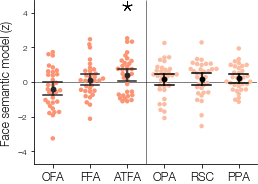

In [18]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_face_hmx_use, 'wiki_use1', 'face', ax=ax, method='t', 
    sig_col='q', sig_alpha=0.1, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_func_face_use.pdf'))
sig

In [6]:
rsa.roi_zstat_perm(
    zstat_face_hmx_sub_use.query('roi == "ATFA"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ATFA,2.164669,0.01899,0.018234,0.01822,0.0,1.0,0.390644,1.036684,0.180463,0.376821


In [7]:
rsa.roi_zstat_perm(
    zstat_face_hmx_sub_occ_use.query('roi == "ATFA"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ATFA,0.028227,0.488828,0.488225,0.488225,1.0,1.0,0.006227,1.267385,0.220623,0.004914


## Scene semantics

Controlling for just the visual model, then adding visual category and subcategory.

In [8]:
zstat_scene_hmx_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use', 'scene', rois
)
zstat_scene_hmx_sub_typ_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_typ_use', 'scene', rois
)

In [9]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_use.query('net == "Scene" and roi != "OPA"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
RSC,2.405656,0.011048,0.010911,0.02182,0.0,2.0,0.305302,0.729042,0.12691,0.418771
PPA,3.628879,0.000490,0.001020,0.00102,0.0,1.0,0.655120,1.037064,0.18053,0.631707


In [10]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_use.query('net == "Face" or roi == "OPA"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
OFA,6.137381,3.648521e-07,0.000010,0.00001,0.0,1.0,1.123937,1.052000,0.183130,1.068381
FFA,3.211755,1.501278e-03,0.002070,0.00621,0.0,3.0,0.455891,0.815410,0.141945,0.559095
ATFA,-0.004194,5.016601e-01,0.878251,2.00533,4.0,4.0,-0.000702,0.961503,0.167376,0.000730
OPA,4.773850,1.915089e-05,0.000040,0.00008,0.0,2.0,0.788843,0.949246,0.165242,0.831021


,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
OFA,6.137381,3.648521e-07,0.000010,0.000010,0.0,1.0,1.123937,1.052000,0.183130,1.068381
FFA,3.211755,1.501278e-03,0.002257,0.009030,0.0,4.0,0.455891,0.815410,0.141945,0.559095
ATFA,-0.004194,5.016601e-01,0.929911,3.013560,6.0,6.0,-0.000702,0.961503,0.167376,0.000730
OPA,4.773850,1.915089e-05,0.000070,0.000140,0.0,2.0,0.788843,0.949246,0.165242,0.831021
RSC,2.405656,1.104819e-02,0.013270,0.066349,1.0,5.0,0.305302,0.729042,0.126910,0.418771
PPA,3.628879,4.904159e-04,0.000993,0.002980,0.0,3.0,0.655120,1.037064,0.180530,0.631707


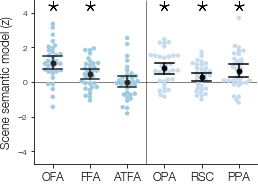

In [19]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_scene_hmx_use, 'wiki_use1', 'scene', ax=ax, method='t', 
    sig_col='q', sig_alpha=0.1, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_func_scene_use.pdf'))
sig

In [12]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_sub_typ_use.query('roi != "ATFA"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
OFA,3.600142,0.000530,0.002690,0.002690,0.0,1.0,0.684413,1.092083,0.190107,0.626704
FFA,0.586305,0.280892,0.704133,1.402826,4.0,5.0,0.100269,0.982426,0.171018,0.102063
OPA,1.946829,0.030189,0.074956,0.149829,1.0,2.0,0.377645,1.114328,0.193980,0.338899
RSC,1.006224,0.160928,0.200429,0.800982,3.0,4.0,0.143351,0.818393,0.142464,0.175161
PPA,1.673781,0.051961,0.086082,0.258097,1.0,3.0,0.352802,1.210847,0.210781,0.291368


## Scene geography

In [13]:
zstat_scene_hmx_use_geo = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use_geo', 'scene', rois
)
zstat_scene_hmx_reg_use_geo = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use_reg_geo', 'scene', rois
)

In [14]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_use_geo.query('roi == "RSC"'), 'geo', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
RSC,2.029906,0.025375,0.0261,0.02612,0.0,1.0,0.359496,1.017361,0.1771,0.353361


In [15]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_use_geo.query('roi != "RSC"'), 'geo', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
OFA,-0.123554,0.548779,0.957460,2.741803,5.0,4.0,-0.026156,1.216106,0.211697,0.021508
FFA,2.198739,0.017622,0.081399,0.087989,1.0,1.0,0.377982,0.987540,0.171909,0.382751
ATFA,0.365825,0.358452,0.838752,1.789572,4.0,3.0,0.070812,1.111956,0.193567,0.063682
OPA,-1.672688,0.947930,1.000000,4.739143,5.0,5.0,-0.359106,1.233287,0.214688,0.291178
PPA,1.208719,0.117813,0.425606,0.586234,2.0,2.0,0.237730,1.129836,0.196679,0.210411


,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
OFA,-0.123554,0.548779,0.971710,3.288667,6.0,5.0,-0.026156,1.216106,0.211697,0.021508
FFA,2.198739,0.017622,0.094289,0.103669,1.0,1.0,0.377982,0.987540,0.171909,0.382751
ATFA,0.365825,0.358452,0.876491,2.148039,5.0,4.0,0.070812,1.111956,0.193567,0.063682
OPA,-1.672688,0.947930,1.000000,5.685563,6.0,6.0,-0.359106,1.233287,0.214688,0.291178
RSC,2.029906,0.025375,0.074959,0.149729,1.0,2.0,0.359496,1.017361,0.177100,0.353361
PPA,1.208719,0.117813,0.480085,0.709023,3.0,3.0,0.237730,1.129836,0.196679,0.210411


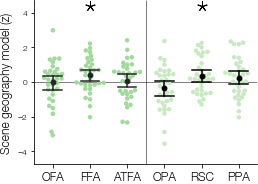

In [20]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_scene_hmx_use_geo, 'geo', 'geo', ax=ax, 
    method='t', sig_col='q', sig_alpha=0.1, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_func_use_geo.pdf'))
sig

In [17]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_reg_use_geo.query('roi == "RSC" or roi == "FFA"'), 'geo', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
FFA,-0.191837,0.575459,0.823562,1.153838,2.0,2.0,-0.032748,0.98063,0.170706,0.033395
RSC,1.542873,0.066347,0.128579,0.132079,1.0,1.0,0.263396,0.98070,0.170718,0.268580
